# Проект "Анализ данных приложения GoFast"

В данном проекте будут изучены данные пользователей приложения для аренды самокатов GoFast. Основной задачей анализа является проверка гипотез, которые помогут увеличить прибыль данного бизнеса.

<a id="ogl"></a>
## Оглавление

* [Оглавление](#ogl)
* [Загрузка данных](#load)
    * [Изучение общей информации о каждом датафрейме](#load1)
* [Предобработка данных](#analisys_data)
    * [Приведение столбца date к типу даты pandas](#analisys_data1)
    * [Создание нового столбца с номером месца на основе столбца date](#analisys_data2)
    * [Проверка наличия пропущенных значений](#analisys_data3)
    * [Поиск дубликатов](#analisys_data4)
* [Исследовательский анализ данных](#develop_data)
    * [Частота встречаемости городов](#develop_data1)
    * [Соотношение пользователей с подпиской и без подписки](#develop_data2)
    * [Возраст пользователей](#develop_data3)
    * [Расстояние, которое пользователь преодолел за одну поездку](#develop_data4)
    * [Продолжительность поездок](#develop_data5)
* [Объединение данных](#data)
    * [Объединение данных о пользователях, поездках и подписках в один датафрейм](#data1)
    * [Создание еще двух датафреймов из датафрейма, созданного на этапе 5.1](#data2)
    * [Визуализация информации о расстоянии и времени поездок для пользователей обеих категорий](#data3)
* [Подсчет выручки](#revenue)
    * [Создание датафрейма с агрегированными данными о поездках](#revenue1)
* [Проверка гипотез](#hypot)
    * [Гипотеза: пользователи с подпиской тратят больше времени на поездки](#hypot1)
    * [Гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров](#hypot2)
    * [Гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки](#hypot3)
* [Заключение](#vivod)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom
from math import sqrt

<a id="load"></a>
## Загрузка данных

In [2]:
users = pd.read_csv('D:/Datasets/3. Статистический анализ/users_go.csv')
rides = pd.read_csv('D:/Datasets/3. Статистический анализ/rides_go.csv')
subs_go = pd.read_csv('D:/Datasets/3. Статистический анализ/subscriptions_go.csv')

<a id="load1"></a>
### Изучение общей информации о каждом датафрейме

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subs_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subs_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Вывод: Выведены первые 10 строк для ознакомления с данными. Столбцы названы верно. Тип данных каждого столбца верный. Кроме столбца с датой, далее тип данных в этом столбце будет изменен на datetime64[ns] для удобства работы с датами. Из общей информации видно, что нулевые значения отсутствуют в таблицах, то есть данные полные.

<a id="analisys_data"></a>
## Предобработка данных

<a id="analisys_data1"></a>
### Приведение столбца date к типу даты pandas

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


<a id="analisys_data2"></a>
### Создание нового столбца с номером месяца на основе столбца date

In [11]:
rides['month'] = rides['date'].dt.month

In [12]:
rides['date'].min()

Timestamp('2021-01-01 00:00:00')

In [13]:
rides['date'].max()

Timestamp('2021-12-30 00:00:00')

Мы располагаем данными за 2021 год.

<a id="analisys_data3"></a>
### Проверка наличия пропущенных значений

In [14]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [15]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [16]:
subs_go.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Вывод: пропущенные значения отсутствуют.

<a id="analisys_data4"></a>
### Поиск дубликатов

Проверяем наличие дубликатов в столбце city.

In [17]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Вывод: в столбце city неявные дубликаты отсутствуют.

Проверяем количество дубликатов в столбце user_id.

In [18]:
users['user_id'].duplicated().sum()

31

Удаляем эти дубликаты.

In [19]:
users = users.drop_duplicates(subset=['user_id'], keep='first')

In [20]:
users['user_id'].duplicated().sum()

0

Вывод: дубликаты в столбце user_id удалены.

В остальных столбцах и других таблицах наличие дубликатов допускается.

**Общий вывод: данные довольно качественные. Не пришлось прилагать много усилий в процессе предобработки даных. Пропущенные значения отсутствовали. Было обнаружено и удалено немного дубликатов в столбце user_id.**

<a id="develop_data"></a>
## Исследовательский анализ данных

<a id="develop_data1"></a>
### Частота встречаемости городов

In [21]:
users

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


In [22]:
pivot_city = pd.pivot_table(users, index=['city'], values=['user_id'], aggfunc={'user_id':'count'})
pivot_city.columns =[('Кол-во пользователей')]
pivot_city=pivot_city.sort_values(by='Кол-во пользователей', ascending=False)
pivot_city

,Кол-во пользователей
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


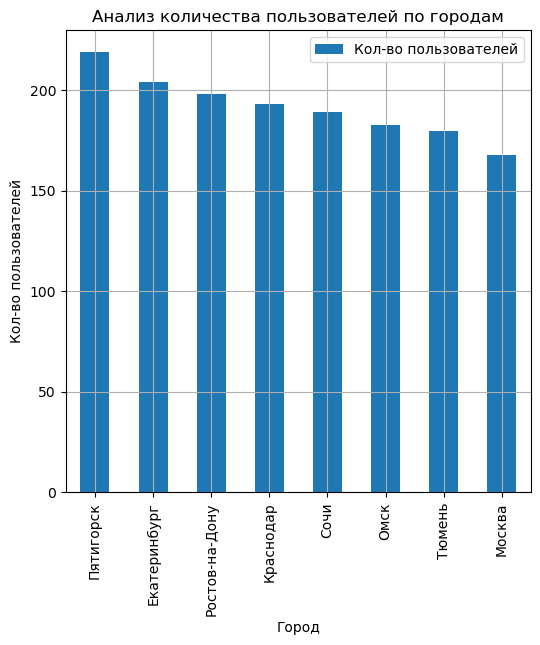

In [23]:
pivot_city.plot.bar(y='Кол-во пользователей',  grid=True, figsize=(6, 6))
plt.xlabel("Город")
plt.ylabel("Кол-во пользователей")
plt.title("Анализ количества пользователей по городам");

Вывод: Пятигорск встречается чаще всего. Меньше всего пользователей почему-то в Москве.

<a id="develop_data2"></a>
### Соотношение пользователей с подпиской и без подписки

In [24]:
vals=users['subscription_type'].value_counts()
vals

subscription_type
free     835
ultra    699
Name: count, dtype: int64

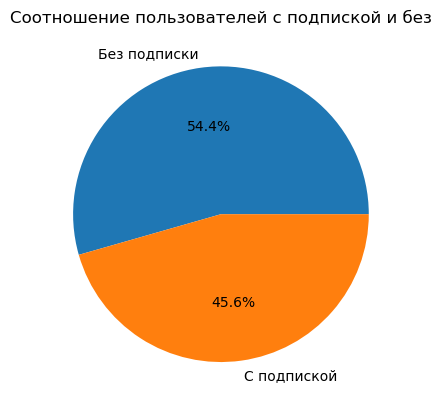

In [25]:
fig, ax = plt.subplots()
ax.pie(vals, labels=["Без подписки", "С подпиской"], autopct='%1.1f%%')
plt.title("Соотношение пользователей с подпиской и без");

Вывод: пользователей без подписки незначительно больше.

<a id="develop_data3"></a>
### Возраст пользователей

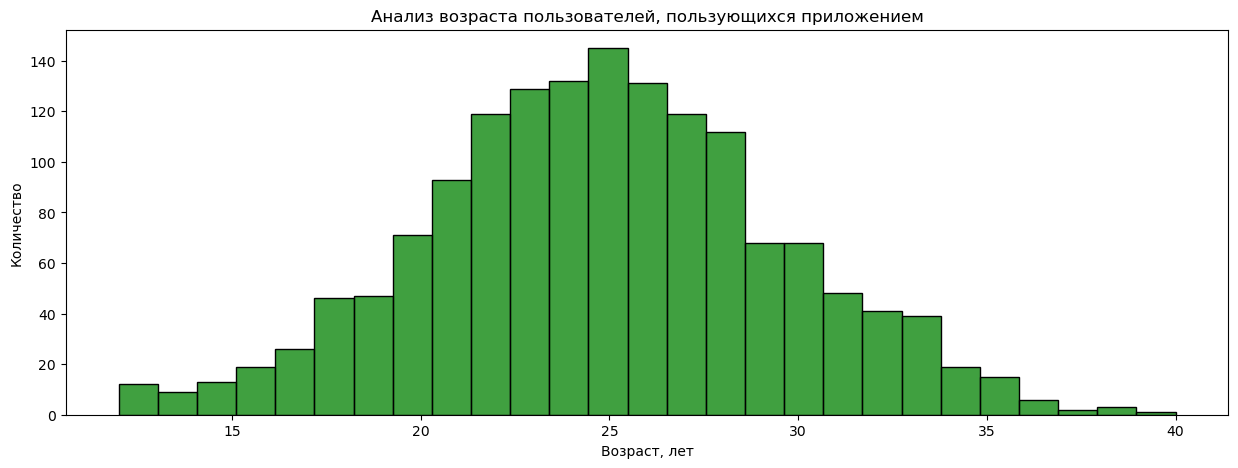

In [26]:
fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=users, x="age", bins=27, binrange=(12, 40), color="green")
plt.xlabel("Возраст, лет")
plt.ylabel("Количество")
plt.title("Анализ возраста пользователей, пользующихся приложением")
plt.show()

Вывод: самая большая группа пользователей - люди от 20 до 30 лет.

<a id="develop_data4"></a>
### Расстояние, которое пользователь преодолел за одну поездку

In [27]:
rides.describe()

,user_id,distance,duration,date,month
count,18068.000000,18068.000000,18068.000000,18068,18068.000000
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296,6.486772
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00,1.000000
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00,4.000000
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00,6.000000
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00,9.000000
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00,12.000000
std,434.734317,1116.831209,6.091051,NaN,3.437410


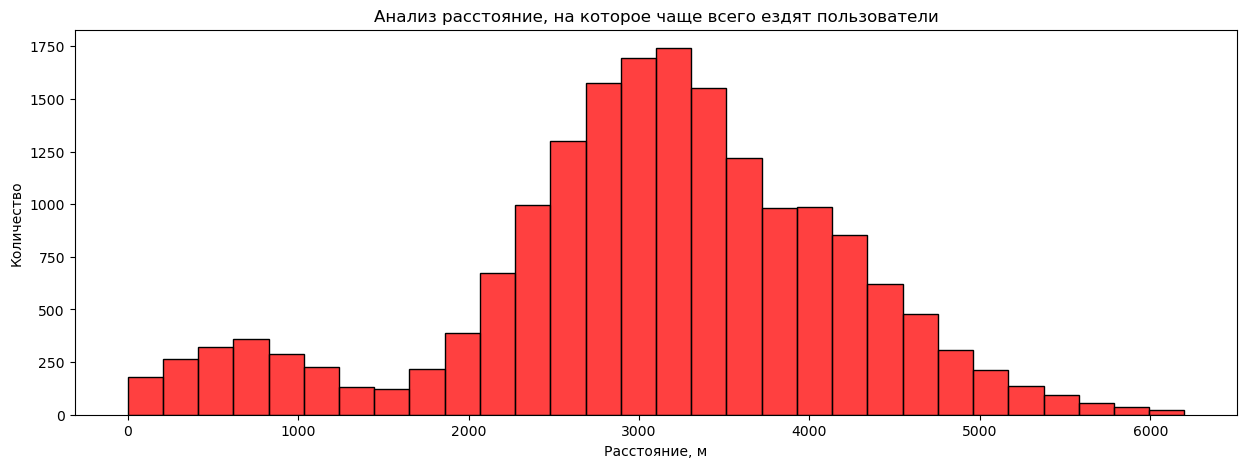

In [28]:
fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=rides, x="distance", bins=30, binrange=(0, 6200), color="red")
plt.xlabel("Расстояние, м")
plt.ylabel("Количество")
plt.title("Анализ расстояние, на которое чаще всего ездят пользователи")
plt.show()

Вывод: в основном пользователи ездят на расстояние от 2,5 до 4 км.

<a id="develop_data5"></a>
### Продолжительность поездок

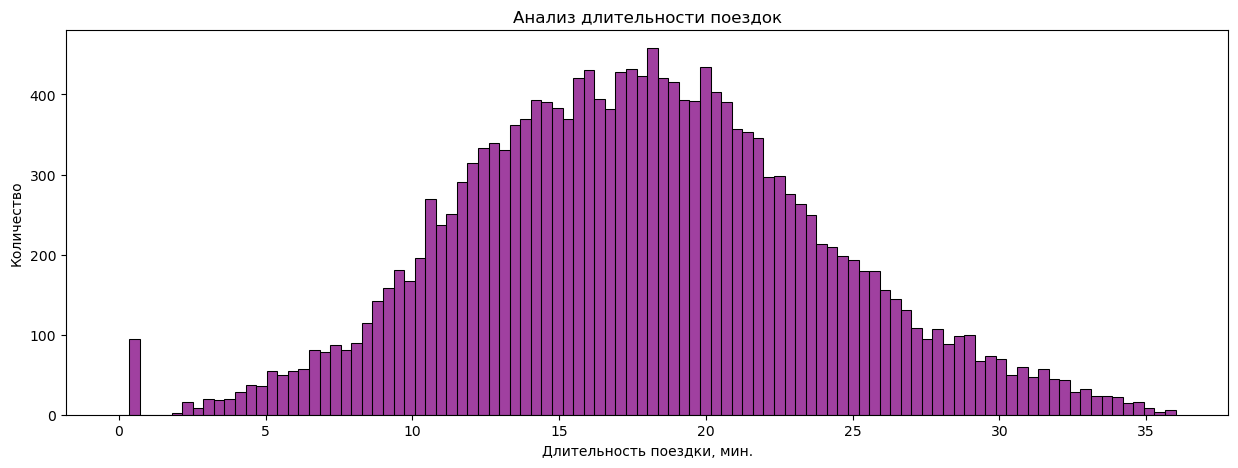

In [29]:
fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=rides, x="duration", bins=100, binrange=(0, 36), color="purple")
plt.xlabel("Длительность поездки, мин.")
plt.ylabel("Количество")
plt.title("Анализ длительности поездок")
plt.show()

Есть аномальные пики около 0. Удалим их.

In [30]:
rides0 = rides.loc[(rides['duration'] < 2)]
rides0

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


Как видно из таблицы длительность поездки составляла 0,5 минуты, хотя пользователи проехали от 4 до 6 км. Ошибка в данных. Эти строки можно удалять.

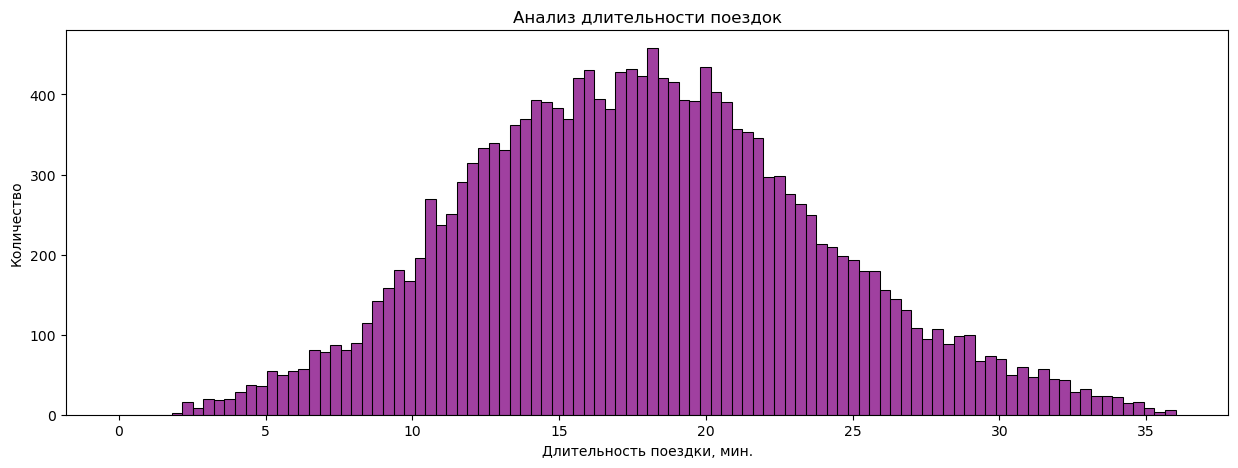

In [31]:
rides = rides.loc[(rides['duration'] > 2)]

fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=rides, x="duration", bins=100, binrange=(0, 36), color="purple")
plt.xlabel("Длительность поездки, мин.")
plt.ylabel("Количество")
plt.title("Анализ длительности поездок")
plt.show()

Вывод: продолжительность поездки чаще всего составляет от 10 до 25 минут.

<a id="data"></a>
## Объединение данных

<a id="data1"></a>
### Объединение данных о пользователях, поездках и подписках в один датафрейм

In [32]:
merged_data = users.merge(rides, on='user_id')

In [33]:
merged_data = merged_data.merge(subs_go, on='subscription_type')

In [34]:
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [35]:
if len(merged_data)==len(rides):
    print('Данные не потеряны')
else:
    print('Данные потеряны')

Данные не потеряны


In [36]:
merged_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пустые значения отсутствуют.

In [37]:
merged_data['distance'] = round(merged_data['distance'])
merged_data['duration'] = np.ceil(merged_data['duration']) 

<a id="data2"></a>
### Создание ещё двух датафреймов из датафрейма, созданного на этапе 5.1

    c данными о пользователях без подписки;
    с данными о пользователях с подпиской.

In [38]:
merged_data_free = merged_data.query('subscription_type == "free"')
merged_data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516.0,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,847.0,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.0,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1206.0,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.0,18.0,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17968,1534,Альберт,25,Краснодар,free,3781.0,20.0,2021-11-04,11,8,50,0
17969,1534,Альберт,25,Краснодар,free,2840.0,22.0,2021-11-16,11,8,50,0
17970,1534,Альберт,25,Краснодар,free,3826.0,19.0,2021-11-18,11,8,50,0
17971,1534,Альберт,25,Краснодар,free,2902.0,17.0,2021-11-27,11,8,50,0


In [39]:
merged_data_ultra = merged_data.query('subscription_type == "ultra"')
merged_data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.0,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3289.0,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.0,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4708.0,16.0,2021-10-17,10,6,0,199


Созданы следующие таблицы:
 - merged_data: объединенные таблицы users, rides и subs_go;
 - merged_data_free: пользователи без подписки;
 - merged_data_ultra: пользователи с подпиской.

<a id="data3"></a>
### Визуализация информации о расстоянии и времени поездок

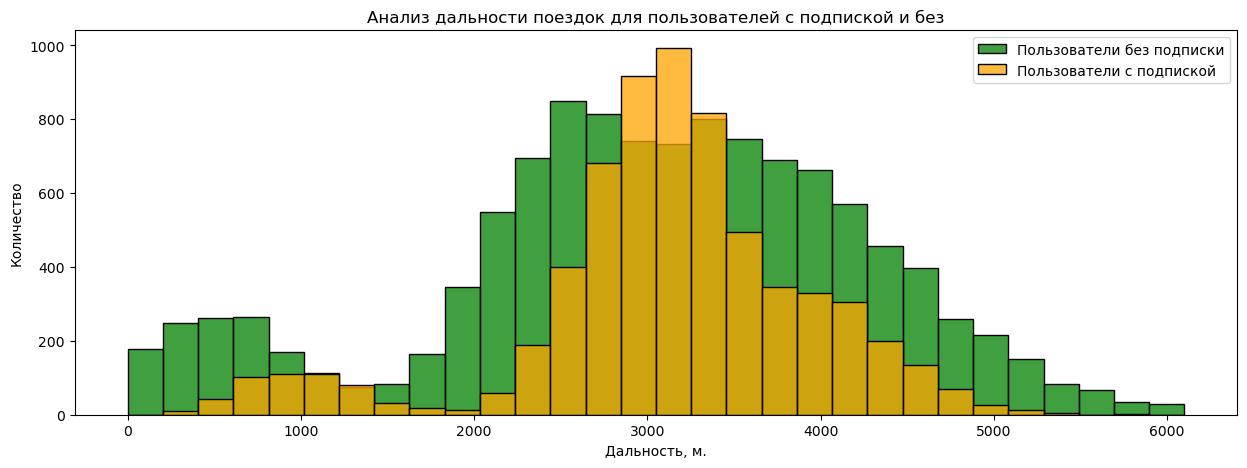

In [40]:
fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=merged_data_free, x="distance", bins=30, binrange=(0, 6100), color="green")
sns.histplot(data=merged_data_ultra, x="distance", bins=30, binrange=(0, 6100), color="orange")
plt.xlabel("Дальность, м.")
plt.ylabel("Количество")
plt.title("Анализ дальности поездок для пользователей с подпиской и без")
plt.legend (('Пользователи без подписки', 'Пользователи с подпиской'))
plt.show()

Вывод: у пользователей с подпиской уже распределение. Много пользователей, которые ездят на расстояние 3 км. Видимо они это делают с определенной целью на постоянной основе. Например, на работу.

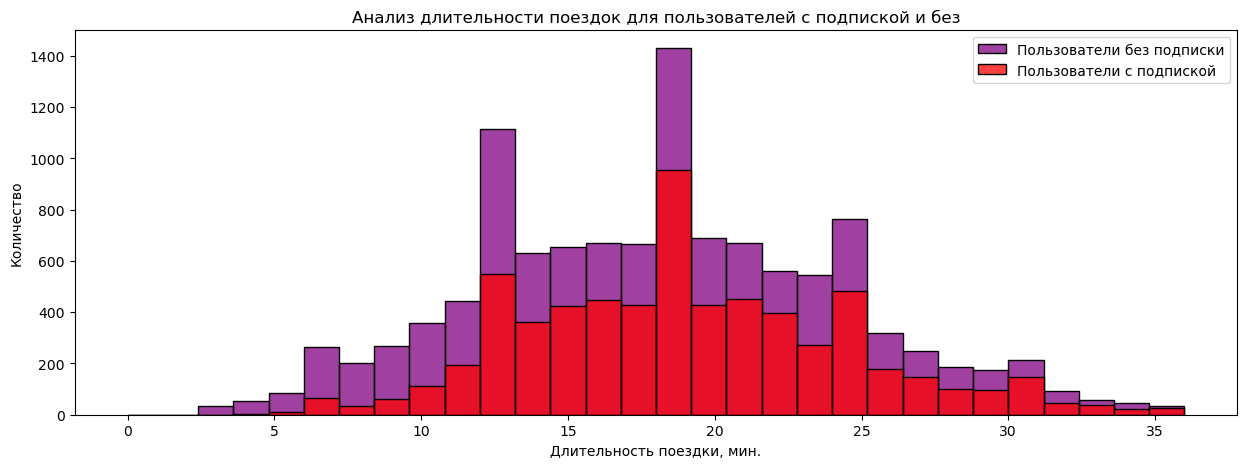

In [41]:
fig, axs = plt.subplots(figsize=(15, 5))

sns.histplot(data=merged_data_free, x="duration", bins=30, binrange=(0, 36), color="purple")
sns.histplot(data=merged_data_ultra, x="duration", bins=30, binrange=(0, 36), color="red")
plt.xlabel("Длительность поездки, мин.")
plt.ylabel("Количество")
plt.title("Анализ длительности поездок для пользователей с подпиской и без")
plt.legend (('Пользователи без подписки', 'Пользователи с подпиской'))
plt.show()

Вывод: время поездки распределено одинаково.

<a id="revenue"></a>
## Подсчёт выручки

<a id="revenue1"></a>
### Создание датафрейма с агрегированными данными о поездках

In [42]:
# создадим датафрейм для расчета выручки
df_income = (
    merged_data.groupby(['user_id', 'month'])    # группируем по пользователю и месяцу
                           .agg(    # агрегируем данные
                               name=('name', 'first'),
                               age=('age', 'first'),
                               city=('city', 'first'),
                               sum_dist=('distance', 'sum'),
                               cnt_trips=('user_id', 'count'), 
                        all_time = ('duration', lambda x: np.ceil(x).sum()) ,
                               subs_type=('subscription_type', 'first'))).reset_index()

In [43]:
df_income

,user_id,month,name,age,city,sum_dist,cnt_trips,all_time,subs_type
0,1,1,Кира,22,Тюмень,7028.0,2,42.0,ultra
1,1,4,Кира,22,Тюмень,754.0,1,7.0,ultra
2,1,8,Кира,22,Тюмень,6724.0,2,46.0,ultra
3,1,10,Кира,22,Тюмень,5810.0,2,32.0,ultra
4,1,11,Кира,22,Тюмень,7004.0,3,56.0,ultra
...,...,...,...,...,...,...,...,...,...
11295,1534,6,Альберт,25,Краснодар,3409.0,2,26.0,free
11296,1534,8,Альберт,25,Краснодар,7623.0,2,48.0,free
11297,1534,9,Альберт,25,Краснодар,4928.0,1,23.0,free
11298,1534,11,Альберт,25,Краснодар,13349.0,4,78.0,free


In [44]:
df_income['income']= (np.where(df_income['subs_type'] == 'free',
                        df_income['all_time'] * 8 + df_income['cnt_trips'] * 50,
                        df_income['all_time'] * 6 + 199))
df_income

,user_id,month,name,age,city,sum_dist,cnt_trips,all_time,subs_type,income
0,1,1,Кира,22,Тюмень,7028.0,2,42.0,ultra,451.0
1,1,4,Кира,22,Тюмень,754.0,1,7.0,ultra,241.0
2,1,8,Кира,22,Тюмень,6724.0,2,46.0,ultra,475.0
3,1,10,Кира,22,Тюмень,5810.0,2,32.0,ultra,391.0
4,1,11,Кира,22,Тюмень,7004.0,3,56.0,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11295,1534,6,Альберт,25,Краснодар,3409.0,2,26.0,free,308.0
11296,1534,8,Альберт,25,Краснодар,7623.0,2,48.0,free,484.0
11297,1534,9,Альберт,25,Краснодар,4928.0,1,23.0,free,234.0
11298,1534,11,Альберт,25,Краснодар,13349.0,4,78.0,free,824.0


<a id="hypot"></a>
## Проверка гипотез

<a id="hypot1"></a>
### Гипотеза: пользователи с подпиской тратят больше времени на поездки

Проверяем гипотезу о равенстве среднего двух генеральных совокупностей с помощью метода scipy.stats.ttest_ind(array1, array2, equal_var, alternative).
Выбран метод scipy.stats.ttest_ind, так как две генеральные совокупности не зависят дург от друга.
Выборочные средние нормально распределены и дисперсии рассматриваемых генеральных совокупностей равны - это видно из п.4.3.

С помощью метода scipy.stats.ttest_ind проверям:
   - нулевая гипотеза - средние значения длительности поездки на самокате пользователей без подписки и с подпиской равны;
   - альтернативная гипотеза - среднее значение длительности поездки выборки пользователей с подпиской больше среднего значения выборки пользователей без подписки.

In [45]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(merged_data_ultra['duration'], merged_data_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 8.577910347796266e-28
Отвергаем нулевую гипотезу


Нулевая ипотеза не подтвердилась. Средние значения не равны.

Значит средняя продолжительность поездки пользователей с подпиской больше, чем у пользователей без подпиской.

<a id="hypot2"></a>
### Гипотеза: cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

Для проведения одностороннего теста применяем метод scipy.stats.ttest_1samp(). 
В качестве аргумента указываем alternative='greater' для правосторонней проверке гипотезы (> 3130 метров).

Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской равно 3130 метров.

Альтернативная гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [46]:
interested_distance = 3130 # Расстояние одной поездки оптимальное с точки зрения износа самоката

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(
    merged_data_ultra['distance'], 
    interested_distance,
    alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195649894697725
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза подтвердилась. Среднее расстояние, которое пользователи с подпиской проезжают близко к 3130 м.

<a id="hypot3"></a>
### Гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки

Нулевая гипотеза: помесячная выручка от пользователей с подпиской и без равны.

Альтернативная гипотеза: помесячная выручка от пользователей с подпиской больше чем от пользователей без подписки.

In [47]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(df_income.loc[df_income['subs_type'] == 'ultra', 'income'], 
                       df_income.loc[df_income['subs_type'] == 'free', 'income'], 
                       alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.0314113674863288e-30
Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась. Значит действительно выручка от пользователей с подпиской больше, чем от пользователей без подписки.

### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. 
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. 
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. 
Какой тест вам понадобился бы для проверки этой гипотезы?

Так как мы имеем две зависимые выборки: до обновления приложения и после. Для проверки гипотез нам потребуется тест scipy.stats.ttest_rel().

<a id="vivod"></a>
## Заключение

В результате анализа статистики популярного сервиса GoFast из нескольких городов была проделана следующая работа.

Предобработка данных:

 - пропуски не выявлены;
 - дубликаты в столбце user_id были удалены;
 - для удобства работы с данными были изменены типы данных в некоторых столбцах;
 - округлены значения в столбцах с расстояниями и временем поездки.
 
Были созданы новые таблицы:
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

Подсчитана выручка сервиса GoFast для пользователей с подпиской и без.

Выдвинуто и проверено несколько гипотез.
1. Тратят ли пользователи с подпиской больше времени на поездки? 
Вывод: действительно пользователи с подпиской тратят больше времени на поездки.

2. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 
Вывод: среднее расстояние, которое пользователи с подпиской проезжают равно или меньше 3130 м.

3. Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?
Вывод: выручка от пользователей с подпиской действительно больше, чем от пользователей без подписки.

Анализ показал, что пользователи с подпиской выгодны для сервиса GoFast. Пользователи с подпиской тратят больше времени на поездки, чаще ездят на большие расстояние (в среднем 3 км.). В связи с чем пользователи с подпиской приносят больше выручки.
Таким образом команде GoFast необходимо приложить больше усилий к тому, чтобы увеличить число пользователей с подпиской.